In [2]:
#importing required packages

import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#loading dataset
dataset=load_dataset('lukebarousse/data_jobs')
#forming a dataframe
df = dataset['train'].to_pandas()


#data cleanup converting date column to date timetype from string type.
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

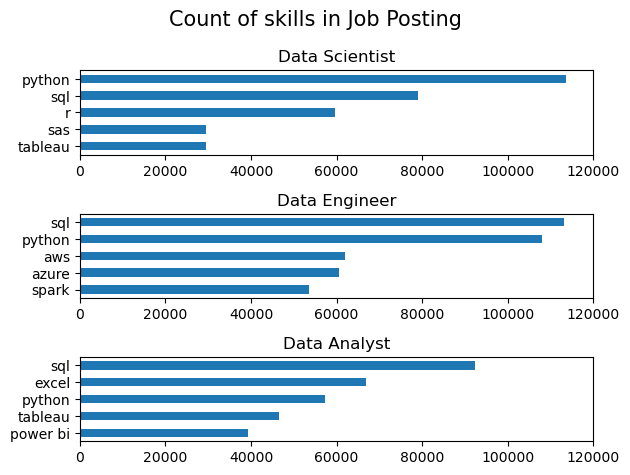

In [3]:
df_copy = df.copy()
df_copy = df_copy.explode('job_skills')
skills_count = df_copy.groupby(['job_title_short','job_skills']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Count of skills in Job Posting', fontsize=15)
fig.tight_layout()

In [4]:
df_US = df[df['job_country']=='United States']

df_skills = df_US.explode('job_skills')

df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,38
1,Business Analyst,airtable,3
2,Business Analyst,alteryx,264
3,Business Analyst,angular,10
4,Business Analyst,ansible,3
...,...,...,...
1865,Software Engineer,wire,2
1866,Software Engineer,word,106
1867,Software Engineer,workfront,2
1868,Software Engineer,yarn,6


In [5]:
df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count[df_skills_count['job_title_short']=='Data Analyst'].sort_values(by='skill_count', ascending=False).head(5)

,job_title_short,job_skills,skill_count
472,Data Analyst,sql,34452
351,Data Analyst,excel,27519
483,Data Analyst,tableau,19311
438,Data Analyst,python,18382
453,Data Analyst,sas,13200


In [6]:
job_titles = df_skills_count.sort_values(by='skill_count', ascending=False)['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

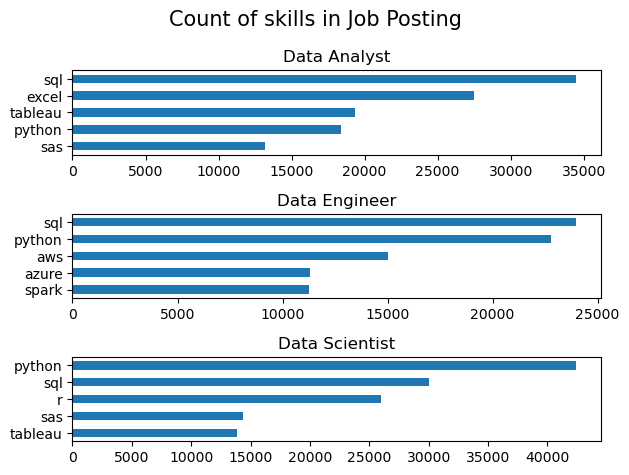

In [7]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].sort_values(by='skill_count', ascending=False).head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax = ax[i], title= job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
   # ax[i].set_xlim(0,120000)



fig.suptitle('Count of skills in Job Posting', fontsize=15)
fig.tight_layout()

In [8]:
df_jobs_total_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [36]:
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,38
1,Business Analyst,airtable,3
2,Business Analyst,alteryx,264
3,Business Analyst,angular,10
4,Business Analyst,ansible,3
...,...,...,...
1865,Software Engineer,wire,2
1866,Software Engineer,word,106
1867,Software Engineer,workfront,2
1868,Software Engineer,yarn,6


In [9]:
df_skill_perc = pd.merge(df_skills_count, df_jobs_total_count, how = 'left', on='job_title_short')
df_skill_perc

,job_title_short,job_skills,skill_count,jobs_total
0,Business Analyst,airflow,38,7382
1,Business Analyst,airtable,3,7382
2,Business Analyst,alteryx,264,7382
3,Business Analyst,angular,10,7382
4,Business Analyst,ansible,3,7382
...,...,...,...,...
1865,Software Engineer,wire,2,1814
1866,Software Engineer,word,106,1814
1867,Software Engineer,workfront,2,1814
1868,Software Engineer,yarn,6,1814


In [ ]:
df_skill_perc['skill_perc'] = 100 * df_skill_perc['skill_count']/df_skill_perc['jobs_total']
#df_skill_perc.drop('skill_perc',axis=1)


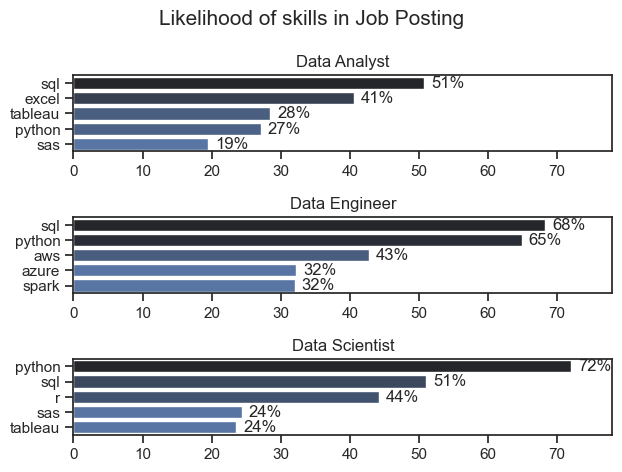

In [ ]:
job_titles = df_skill_perc.sort_values(by='skill_count', ascending=False)['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])

fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short']==job_title].sort_values(by='skill_count', ascending=False).head(5)
    sns.barplot(data=df_plot, x='skill_perc', y='job_skills', ax=ax[i], hue= 'skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,78)
    for n,v in enumerate(df_plot['skill_perc']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i!=len(job_titles) - 1:
        ax[i].set_xticks([])


fig.suptitle('Likelihood of skills in Job Posting', fontsize=15)
fig.tight_layout()